# Competition for glucose, with internal goods X and Y, and social objective (model), Time-step growth model

In [1]:
import cobra
import pandas as pd
import numpy as np
import pickle
import math
from cobra.flux_analysis import pfba

In [2]:
# import map visualization tools
from utils import show_map
import escher
map_loc = 'Three_cells_system_modelIIMap.json' # the escher map used below
# show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

M = cobra.io.load_json_model('Three_cells_system_modelII.json')
model = M.copy()

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


/Users/yanhualiu/Desktop/New_topic/model_building/model_building_exercise_by_yanhua/Cells' competition paper/Three cell types considering growth for paper/Cell types just including one mutation as cell type1/utils/findBiomarkers.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
b = show_map([],map_loc)
b

An empty solution was passed.


Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={}, reaction_scale=[{'type': '…

In [3]:
### Internal goods X and Y
model.reactions.EX_Com_goodX_e.lower_bound=0
model.reactions.EX_Com_goodY_e.lower_bound=0
model.reactions.EX_glucose_e.lower_bound=-1
quadratic_objective = M.problem.Objective(model.reactions.biomass1.flux_expression +
    model.reactions.biomass2.flux_expression + model.reactions.biomass3.flux_expression ,direction='max')
model.objective = quadratic_objective

In [4]:
sol = model.optimize()
sol.objective_value
fbasol = model.optimize()
b = show_map(fbasol,map_loc)
b

0.5

Builder(hide_secondary_metabolites=False, highlight_missing=True, reaction_data={'EX_glucose_e': -1.0, 'GlcT':…

In [6]:
### FVA result
rxnsOfInterest=['EX_glucose_e','GlcT','GTI1','GTI2','GTI3',
                'biomass1','biomass2','biomass3','DI1X','DI2Y']
fvasol = cobra.flux_analysis.flux_variability_analysis(model,reaction_list=rxnsOfInterest,fraction_of_optimum=1)
fvasol

,minimum,maximum
EX_glucose_e,-1.00,-1.00
GlcT,1.00,1.00
GTI1,0.00,0.75
GTI2,0.25,0.75
GTI3,0.00,0.75
biomass1,0.00,0.50
biomass2,0.00,0.50
biomass3,0.00,0.50
DI1X,0.00,0.25
DI2Y,0.25,0.25


# Time stepwise growth calculation (model1)

## Without regulation (the regulation between the cell1 and cell2 is dependent of the regulation in the initial time.

### Control (Cell type 3 gets regulation from cell type 2 and exists regulation to cell type 2.)

In [12]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1986 0.2912 0.0102


Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=1.2$)')

Text(0, 0.5, 'Cell number (billions)')

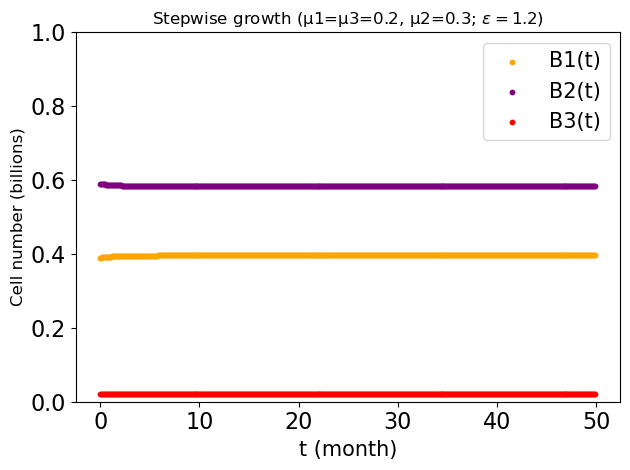

In [13]:
##𝛆=1.2; b1=0.1986; b2=0.2912; b3=0.0102
##𝛆=1; b1=0.1902; b2=0.3; b3=0.0098
##𝛆=0.8; b1=0.1820; b2=0.3087; b3=0.0093
##𝛆=0.5; b1=0.1699; b2=0.3214; b3=0.0087
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1986]
Fluxes2_list=[0.2912]
Fluxes3_list=[0.0102]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
Ratio1_list=[19.5]
Ratio2_list=[19.5]
def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=1.2
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    b1=0.5*0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A)))
    b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A)))
    b3=0.5*0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A)))
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
    Ratio1=B1_vals[-1]/B3_vals[-1]
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
    Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
    Ratio1_list.append(Ratio1)
    Ratio2_list.append(Ratio2)
    
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("t (month)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0.5$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
plt.ylabel("Cell number (billions)",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0.5$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=600)

### Case 1 (Cell type 3 lost regulation from cell type 2 and lost regulation to cell type 2.)

In [20]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.2018 0.2787 0.0195


Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=1.2$)')

Text(0, 0.5, 'Cell number (billions)')

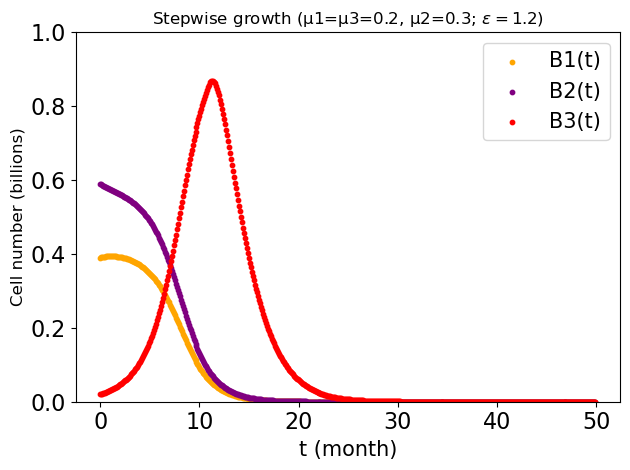

In [21]:
##𝛆=1.2; b1=0.2018; b2=0.2787; b3=0.0195
##𝛆=1; b1=0.1933; b2=0.2899; b3=0.0168
##𝛆=0.8; b1=0.1847; b2=0.3009; b3=0.0144
##𝛆=0.5; b1=0.1717; b2=0.3168; b3=0.0115
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.2018]
Fluxes2_list=[0.2787]
Fluxes3_list=[0.0195]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
Ratio1_list=[19.5]
Ratio2_list=[14.9]
def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=1.2
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    
    b1=0.5*0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))+0.2*B3_vals[-1])
    b2=0.5*0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))+0.2*B3_vals[-1])
    b3=0.5*0.2*B3_vals[-1]/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))+0.2*B3_vals[-1])
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    Ratio1=B1_vals[-1]/B3_vals[-1]
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
    Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
    Ratio1_list.append(Ratio1)
    Ratio2_list.append(Ratio2)
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("t (month)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0.5$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
plt.ylabel("Cell number (billions)",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0.5$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=600)

In [38]:
print(b1+b2+b3)

0.5


### Case 2 (Cell type 3 lost regulation from cell type 2 and still existed regulation to cell type 2.)

In [28]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.169 0.3197 0.0113


Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=0.5$)')

Text(0, 0.5, 'Cell number (billions)')

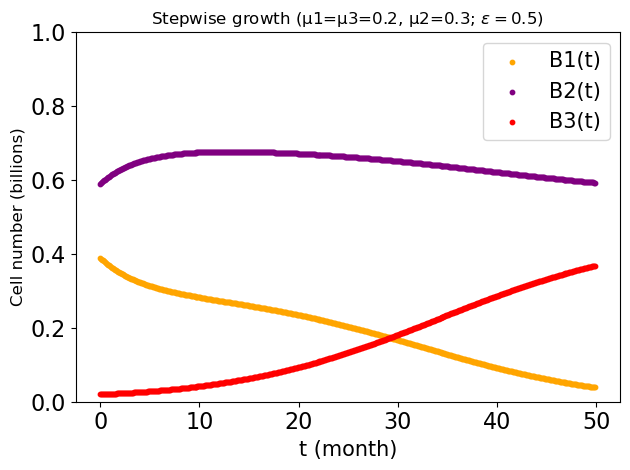

In [29]:
##𝛆=1.2; b1=0.1951; b2=0.2861; b3=0.0188
##𝛆=1; b1=0.1877; b2=0.2960; b3=0.0163
##𝛆=0.8; b1=0.1802; b2=0.3057; b3=0.0141
##𝛆=0.5; b1=0.1690; b2=0.3197; b3=0.0113
##𝛆=0; b1=0.1506; b2=0.3417; b3=0.0077
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1690]
Fluxes2_list=[0.3197]
Fluxes3_list=[0.0113]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]

Ratio1_list=[19.5]
Ratio2_list=[10.4]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=0.5
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    

    b1=0.5*0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1])
    b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1])
    b3=0.5*0.2*B3_vals[-1]/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]+B3_vals[-1]),A))+0.2*B3_vals[-1])
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
    Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
    Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    Ratio1_list.append(Ratio1)
    Ratio2_list.append(Ratio2)
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("t (month)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0.5$'')',fontsize=12)
plt.ylabel("Cell number (billions)",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=600)

In [19]:
print(B1_vals[-1],B2_vals[-1],B3_vals[-1])

5.9264550771782915e-08 0.2869930498762703 0.7130068908591778


In [18]:
print(b1+b2+b3)

0.5


### Case 3 (Cell type lost regulation to cell type 2, but still existed regulation from cell type 2) 

In [36]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.2056 0.2839 0.0105


Text(0.5, 0, 't (month)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=1.2$)')

Text(0, 0.5, 'Cell number (billions)')

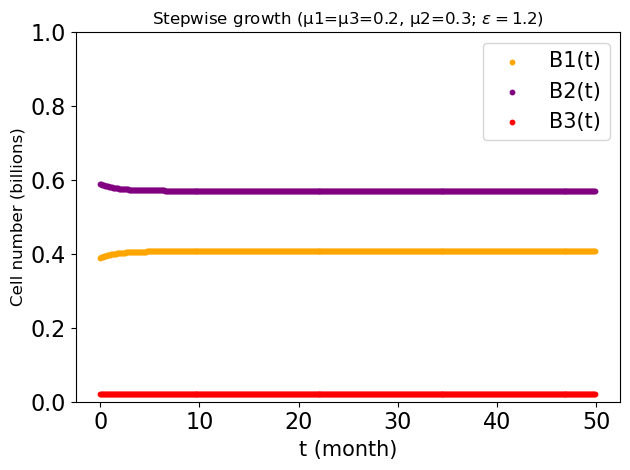

In [37]:
##𝛆=1.2; b1=0.2056; b2=0.2839; b3=0.0105
##𝛆=1; b1=0.1960; b2=0.2940; b3=0.0100
##𝛆=0.8; b1=0.1865; b2=0.3039; b3=0.0096
##𝛆=0.5; b1=0.1726; b2=0.3185; b3=0.0089
##𝛆=0; b1=0.1506; b2=0.3417; b3=0.0077
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.2056]
Fluxes2_list=[0.2839]
Fluxes3_list=[0.0105]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
Ratio1_list=[19.5]
Ratio2_list=[19.6]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=1.2
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    b1=0.5*0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A)))
    b2=0.5*0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A)))
    b3=0.5*0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1],A))+0.3*B2_vals[-1]*(math.pow(B1_vals[-1],A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1],A)))
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
    Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    Ratio1_list.append(Ratio1)
    Ratio2_list.append(Ratio2)
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("t (month)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0.5$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
plt.ylabel("Cell number (billions)",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=600)

## Without regulation (the regulation between the cell1 and cell2 is independent of the regulation in the initial time.)

### Control (Cell type 3 gets regulation from cell type 2 and exists regulation to cell type 2.) (Autistic and egoistic case)

In [78]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/v

0.1505791505791506 0.3416988416988417 0.007722007722007707


/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var/folders/d7/l6g7ly057s9bcdclxhvjs64h0000gn/T/ipykernel_8954/785917045.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Ratio2=Fluxes1/Fluxes3
/var

Text(0.5, 0, 'time (h)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=0$)')

Text(0, 0.5, 'Cell number')

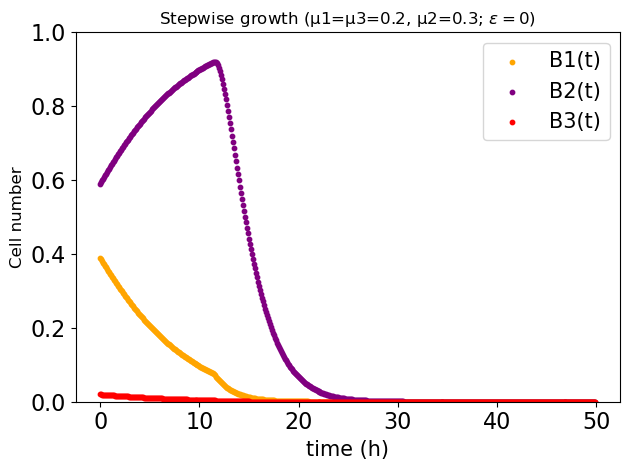

In [79]:
##𝛆=1.2; b1=0.1506; b2=0.3417; b3=0.0077
##𝛆=1; b1=0.1506; b2=0.3417; b3=0.0077
##𝛆=0.8; b1=0.1506; b2=0.3417; b3=0.0077
##𝛆=0.5; b1=0.1506; b2=0.3417; b3=0.0077

import matplotlib.pyplot as plt
plt.figure()
T_list=[]
Fluxes1_list=[]
Fluxes2_list=[]
Fluxes3_list=[]
B1_vals=[]
B2_vals=[]
B3_vals=[]
Ratio1_list=[]
Ratio2_list=[]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=0
for t in np.arange(0,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)

    b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1]/0.59,A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1]/0.59,A)))
    b2=0.5*0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1]/0.59,A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1]/0.59,A)))
    b3=0.5*0.2*B3_vals[-1]*(math.pow(B2_vals[-1]/0.59,A))/(0.2*B1_vals[-1]*(math.pow(B2_vals[-1]/0.59,A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1]*(math.pow(B2_vals[-1]/0.59,A)))

#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    
    Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
    Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
    Ratio1_list.append(Ratio1)
    Ratio2_list.append(Ratio2)
    
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("time (h)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0$'')',fontsize=12)
plt.ylabel("Cell number",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=300)

##regulation power for cell type3 is higher than  other.

In [185]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1506 0.3417 0.0077


Text(0.5, 0, 'time (h)')

(0.0, 0.5)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=4$)')

Text(0, 0.5, 'Biomass synthesis rate')

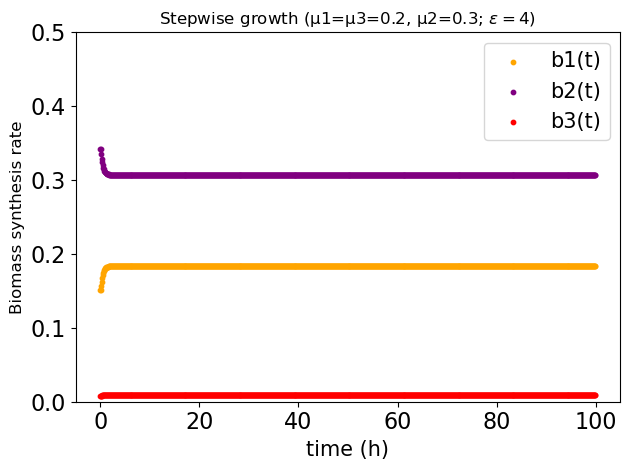

In [186]:
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1506]
Fluxes2_list=[0.3417]
Fluxes3_list=[0.0077]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
# Ratio1_list=[]
# Ratio2_list=[]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=4
B=4
for t in np.arange(1,1000,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)

    b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B)))
    b2=0.5*0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B)))
    b3=0.5*0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B)))

    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
#     Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
#     Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
    Ratio1_list.append(Ratio1)
    Ratio2_list.append(Ratio2)
    
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
plt.scatter(T_list,Fluxes3_list,color='red',s=10)
# plt.scatter(T_list,B1_vals,color='orange',s=10)
# plt.scatter(T_list,B2_vals,color='purple',s=10)
# plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("time (h)",fontsize=15)

plt.ylim(0,0.5)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=4$'')',fontsize=12)
plt.ylabel("Biomass synthesis rate", fontsize=12)
plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

# plt.ylim(0,1)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=4$'')',fontsize=12)
# plt.ylabel("Cell number",fontsize=12)
# plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=300)

### Case 1 (Cell type 3 lost regulation from cell type 2 and lost regulation to cell type 2.)

In [64]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1506 0.3417 0.0077


Text(0.5, 0, 'time (h)')

(0.0, 0.5)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=2$)')

Text(0, 0.5, 'Biomass synthesis rate')

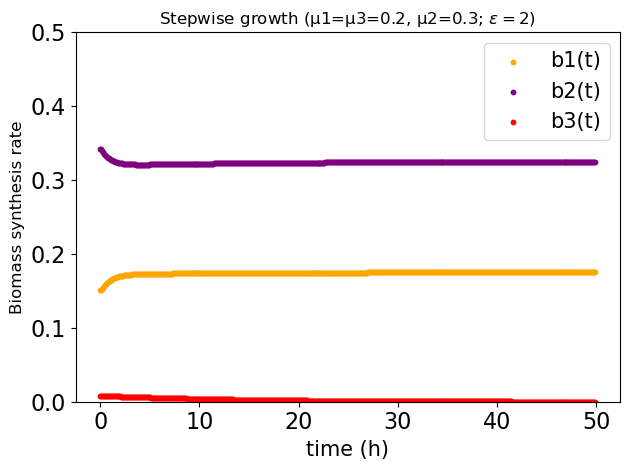

In [65]:
##𝛆=1.2; b1=0.1506; b2=0.3417; b3=0.0077
##𝛆=1; b1=0.1506; b2=0.3417; b3=0.0077
##𝛆=0.8; b1=0.1506; b2=0.3417; b3=0.0077
##𝛆=0.5; b1=0.1506; b2=0.3417; b3=0.0077
##0.3077 0.6923
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1506]
Fluxes2_list=[0.3417]
Fluxes3_list=[0.0077]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
# Ratio1_list=[]
# Ratio2_list=[]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=2
B=0
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    
    b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1])
    b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1])
    b3=0.5*0.2*B3_vals[-1]/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1])
    
#     b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.6923),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.6923),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.2877),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.6923),B)))
#     b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.2877),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.6923),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.2877),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.6923),B)))
#     b3=0.5*0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.6923),B))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.6923),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.2877),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.6923),B)))
    
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
#     Ratio1=B1_vals[-1]/B3_vals[-1]
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
#     Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
#     Ratio1_list.append(Ratio1)
#     Ratio2_list.append(Ratio2)

    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
plt.scatter(T_list,Fluxes3_list,color='red',s=10)
# plt.scatter(T_list,B1_vals,color='orange',s=10)
# plt.scatter(T_list,B2_vals,color='purple',s=10)
# plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("time (h)",fontsize=15)

plt.ylim(0,0.5)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
plt.ylabel("Biomass synthesis rate", fontsize=12)
plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

# plt.ylim(0,1)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
# plt.ylabel("Cell number",fontsize=12)
# plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,50)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=0$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=300)

In [41]:
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0]) 

0.1505791505791506 0.3416988416988417 0.007722007722007707


### Case 2 (Cell type 3 lost regulation from cell type 2 and still existed regulation to cell type 2.) (Autistic case)

In [90]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1506 0.3417 0.0077


Text(0.5, 0, 'time (h)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=2$)')

Text(0, 0.5, 'Cell number')

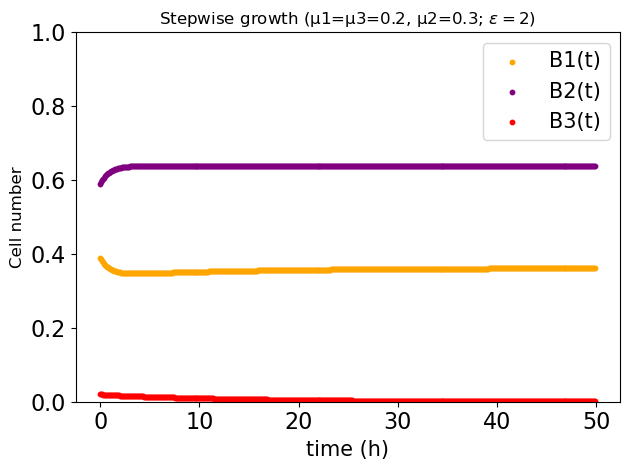

In [91]:
##𝛆=1.2; b1=0.1951; b2=0.2861; b3=0.0188
##𝛆=1; b1=0.1877; b2=0.2960; b3=0.0163
##𝛆=0.8; b1=0.1802; b2=0.3057; b3=0.0141
##𝛆=0.5; b1=0.1690; b2=0.3197; b3=0.0113
##𝛆=0; b1=0.1506; b2=0.3417; b3=0.0077
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1506]
Fluxes2_list=[0.3417]
Fluxes3_list=[0.0077]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]

# Ratio1_list=[]
# Ratio2_list=[]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=2
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    

    b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1])
    b2=0.5*0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1])
    b3=0.5*0.2*B3_vals[-1]/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow(((B1_vals[-1]+B3_vals[-1])/0.41),A))+0.2*B3_vals[-1])
   
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
#     Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
#     Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
#     Ratio1_list.append(Ratio1)
#     Ratio2_list.append(Ratio2)

    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("time (h)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
plt.ylabel("Cell number",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=300)

### Case 3 (Cell type lost regulation to cell type 2, but still existed regulation from cell type 2) (egoistic case)

In [116]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1506 0.3417 0.0077


Text(0.5, 0, 'time (h)')

(0.0, 1.0)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=2$)')

Text(0, 0.5, 'Cell number')

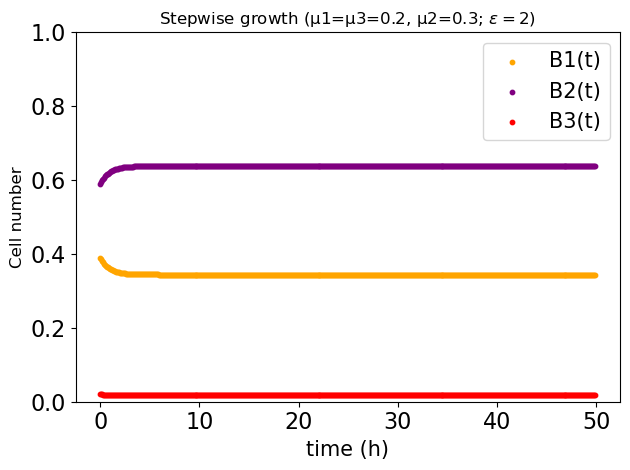

In [117]:
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1506]
Fluxes2_list=[0.3417]
Fluxes3_list=[0.0077]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
# Ratio1_list=[]
# Ratio2_list=[]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=2
for t in np.arange(1,500,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)

    b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),A)))
    b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),A)))
    b3=0.5*0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),A)))
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)
    
#     Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
#     Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
#     Ratio1_list.append(Ratio1)
#     Ratio2_list.append(Ratio2)
    
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
# plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
# plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
# plt.scatter(T_list,Fluxes3_list,color='red',s=10)
plt.scatter(T_list,B1_vals,color='orange',s=10)
plt.scatter(T_list,B2_vals,color='purple',s=10)
plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("time (h)",fontsize=15)

# plt.ylim(0,0.5)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
# plt.ylabel("Biomass synthesis rate", fontsize=12)
# plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

plt.ylim(0,1)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=2$'')',fontsize=12)
plt.ylabel("Cell number",fontsize=12)
plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=300)

##regulation power for cell type3 is higher than  other.

In [189]:
model1=model.copy()
model2=model1.copy()

<Figure size 640x480 with 0 Axes>

0.1506 0.3417 0.0077


Text(0.5, 0, 'time (h)')

(0.0, 0.5)

Text(0.5, 1.0, 'Stepwise growth (µ1=µ3=0.2, µ2=0.3; $\\varepsilon=4$)')

Text(0, 0.5, 'Biomass synthesis rate')

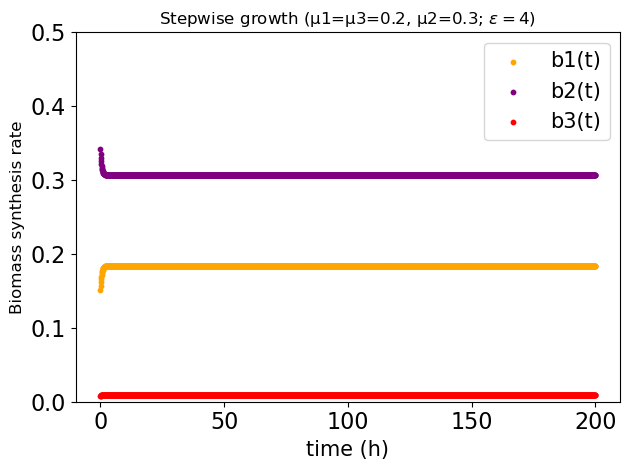

In [190]:
import matplotlib.pyplot as plt
plt.figure()
T_list=[0]
Fluxes1_list=[0.1506]
Fluxes2_list=[0.3417]
Fluxes3_list=[0.0077]
B1_vals=[0.39]
B2_vals=[0.59]
B3_vals=[0.02]
# Ratio1_list=[]
# Ratio2_list=[]

def B1(t):
    if(t<=0):
        return 0.39
    return B1_vals[int((t-1)/1)]*0.95+0.1*Fluxes1_list[-1]
def B2(t):
    if(t<=0):
        return 0.59
    return B2_vals[int((t-1)/1)]*0.95+0.1*Fluxes2_list[-1]
def B3(t):
    if(t<=0):
        return 0.02
    return B3_vals[int((t-1)/1)]*0.95+0.1*Fluxes3_list[-1]
A=4
B=4
for t in np.arange(1,2000,1):
    B1_t = B1(t)
    B2_t = B2(t)
    B3_t = B3(t)
    
    B1_vals.append(B1_t)
    B2_vals.append(B2_t)
    B3_vals.append(B3_t)

    b1=0.5*0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B)))
    b2=0.5*0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B)))
    b3=0.5*0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B))/(0.2*B1_vals[-1]*(math.pow((B2_vals[-1]/0.59),A))+0.3*B2_vals[-1]*(math.pow((B1_vals[-1]/0.39),A))+0.2*B3_vals[-1]*(math.pow((B2_vals[-1]/0.59),B)))
    
#     B1_vals.append(B1_t)
#     B2_vals.append(B2_t)
#     B3_vals.append(B3_t)
    
#     Ratio1=B1_vals[-1]/B3_vals[-1]
    
    model2.reactions.biomass3.upper_bound=b3
    model2.reactions.biomass2.upper_bound=b2
    model2.reactions.biomass1.upper_bound=b1
    model2.reactions.DI1X.upper_bound=3*B1_vals[-1]
    model2.reactions.DI2Y.upper_bound=3*B2_vals[-1]
    model2.reactions.DI3X.upper_bound=3*B3_vals[-1]
    sol = model2.optimize()
    obj_val = sol.objective_value
    Fluxes3=sol.fluxes.loc['biomass3']
    Fluxes2=sol.fluxes.loc['biomass2']
    Fluxes1=sol.fluxes.loc['biomass1']
#     Ratio2=Fluxes1/Fluxes3
    
    Fluxes1_list.append(Fluxes1)
    Fluxes2_list.append(Fluxes2)
    Fluxes3_list.append(Fluxes3)
    
#     Ratio1_list.append(Ratio1)
#     Ratio2_list.append(Ratio2)
    
    T=t/10
    T_list.append(T)
print(Fluxes1_list[0],Fluxes2_list[0],Fluxes3_list[0])           
plt.scatter(T_list,Fluxes1_list,color='orange',s=10)
plt.scatter(T_list,Fluxes2_list,color='purple',s=10)
plt.scatter(T_list,Fluxes3_list,color='red',s=10)
# plt.scatter(T_list,B1_vals,color='orange',s=10)
# plt.scatter(T_list,B2_vals,color='purple',s=10)
# plt.scatter(T_list,B3_vals,color='red',s=10)

# plt.scatter(T_list,Ratio1_list,color='red',s=10)
# plt.scatter(T_list,Ratio2_list,color='green',s=10)

plt.xlabel("time (h)",fontsize=15)

plt.ylim(0,0.5)
plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=4$'')',fontsize=12)
plt.ylabel("Biomass synthesis rate", fontsize=12)
plt.legend(['b1(t)','b2(t)','b3(t)'],loc='upper right')

# plt.ylim(0,1)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=4$'')',fontsize=12)
# plt.ylabel("Cell number",fontsize=12)
# plt.legend(['B1(t)','B2(t)','B3(t)'],loc='upper right')

# plt.ylim(0,20)
# plt.title('Stepwise growth (µ1=µ3=0.2, µ2=0.3; 'r'$\varepsilon=1.2$'')',fontsize=12)
# plt.ylabel("Cell number and biomass synthesis ratio",fontsize=12)
# plt.legend(['B1(t)/B3(t)','b1(t)/b3(t)'],loc='center right')

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.rcParams['legend.fontsize']=15
plt.tight_layout()
# plt.show()
plt.savefig('Only regulation between biomass1 and biomass2(Obj=b1+b2+b3)',dpi=300)